In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [6]:
Nov8_1 = pd.read_csv('Nov8_1.csv')
Nov8_3 = pd.read_csv('Nov8_3.csv')

#Position
Nov8_1_time1 = Nov8_1['Run 1:Time(s)']
Nov8_1_position1 = Nov8_1['Run 1:Position(m)']

Nov8_1_time2 = Nov8_1['Run 2:Time(s)']
Nov8_1_position2 = Nov8_1['Run 2:Position(m)']

Nov8_1_time3 = Nov8_1['Run 3:Time(s)']
Nov8_1_position3 = Nov8_1['Run 3:Position(m)']

Nov8_1_time4 = Nov8_1['Run 4:Time(s)']
Nov8_1_position4 = Nov8_1['Run 4:Position(m)']

Nov8_1_time5 = Nov8_1['Run 5:Time(s)']
Nov8_1_position5 = Nov8_1['Run 5:Position(m)']


(0.5, 1.5)

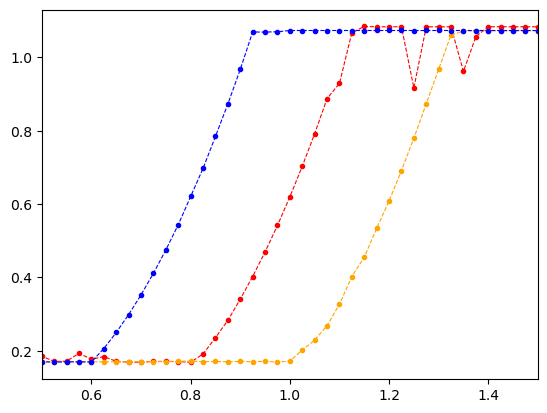

In [3]:
plt.plot(Nov8_1_time1, Nov8_1_position1, 'o--', lw = 0.8, ms = 3, color = 'r')
plt.plot(Nov8_1_time2, Nov8_1_position2,  'o--', lw = 0.8, ms = 3, color = 'orange') 
#plt.plot(Nov8_1_time3, Nov8_1_position3,  'o--', lw = 0.8, ms = 3, color = 'yellow' )
#plt.plot(Nov8_1_time4, Nov8_1_position4,  'o--', lw = 0.8, ms = 3, color = 'green') 
plt.plot(Nov8_1_time5, Nov8_1_position5,  'o--', lw = 0.8, ms = 3, color = 'blue') 
plt.xlim(0.5, 1.5)

In [4]:
def model_parabola(t, g, v0, y0):
    return (0.5)*g*t**2 + v0*t +  y0

timeframe = np.arange(0, 0.350, 0.025)

<b>Coefficient of Determination</b>

$$R^2 = 1 - \displaystyle \frac{\sum_{i = 1}^N( y_i - \hat{y}_i)^2 }{\sum_{i = 1}^N ( y_i - \bar{y})^2}
$$

In [5]:
#Run 2
mask = (Nov8_1_time2 >=  0.9999999999999998) & (Nov8_1_time2 <=1.325)
filtered_Nov8_1_position2 = Nov8_1_position2[mask]

g2, v02, y02 = curve_fit(model_parabola, timeframe, filtered_Nov8_1_position2, p0= [9.8, 0, Nov8_1_position2[0]])[0]

g2_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position2, p0= [9.8, 0, Nov8_1_position1[0]])[1][0][0]

v02_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position2, p0= [9.8, 0, Nov8_1_position1[0]])[1][1][1]

y02_var = curve_fit(model_parabola, timeframe, filtered_Nov8_1_position2, p0= [9.8, 0, Nov8_1_position1[0]])[1][2][2]

sum_of_squares_total = np.sum(( filtered_Nov8_1_position2 - np.mean(filtered_Nov8_1_position2))**2)
sum_of_squares_residual = np.sum(( filtered_Nov8_1_position2 - model_parabola(timeframe, g2, v02, y02) )**2)
R_squared_2 = 1 - (sum_of_squares_residual / sum_of_squares_total)
R_squared_2

0.9992635345356041

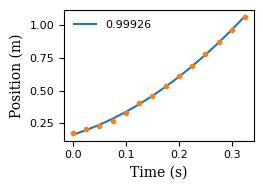

The experimental value of $g$ from Run 2 is 9.337515411909767 or ~ 9.34
The experimental value of initial velocity and initial height from Run 5 are 1.2860568198349538 ± 0.087434484526817 or ~ 1.29 ± 0.09 and 0.16122531305710738±0.006119314547235262 or ~ 0.16±0.006


In [6]:
#Plot for Run 2
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")

plt.plot(timeframe, model_parabola(timeframe, g2, v02, y02),label = f'{R_squared_2:.5f}' )
plt.plot(timeframe, filtered_Nov8_1_position2, 'o', ms =3)

plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 8)
plt.legend(fontsize = 8, loc = 'best',  frameon = False)
plt.tight_layout()
plt.savefig('Run2_parabola_fit.pdf')
plt.show()
print(f'The experimental value of $g$ from Run 2 is {g2} or ~ {g2:.2f}')
print(f'The experimental value of initial velocity and initial height from Run 5 are {v02 } \u00B1 {np.sqrt(v02_var)} or ~ {v02:.2f} \u00B1 {np.sqrt(v02_var):.2f} and {y02}\u00B1{np.sqrt(y02_var)} or ~ {y02:.2f}\u00B1{np.sqrt(y02_var):.3f}')

In [7]:
#Run 5
mask = (Nov8_1_time5 >= 0.5999999999999999) & (Nov8_1_time2 <= 0.925)
filtered_Nov8_1_position5 = Nov8_1_position5[mask]

g5, v05, y05 = curve_fit(model_parabola,timeframe, filtered_Nov8_1_position5, p0= [9.8, 0, Nov8_1_position5[0]])[0]

g5_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position5, p0= [9.8, 0, Nov8_1_position1[0]])[1][0][0]

v05_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position5, p0= [9.8, 0, Nov8_1_position1[0]])[1][1][1]

y05_var = curve_fit(model_parabola, timeframe, filtered_Nov8_1_position5, p0= [9.8, 0, Nov8_1_position1[0]])[1][2][2]

sum_of_squares_total = np.sum(( filtered_Nov8_1_position5 - np.mean(filtered_Nov8_1_position5))**2)
sum_of_squares_residual = np.sum(( filtered_Nov8_1_position5 - model_parabola(timeframe, g5, v05, y05) )**2)
R_squared_5 = 1 - (sum_of_squares_residual / sum_of_squares_total)
R_squared_5

0.9999911545161997

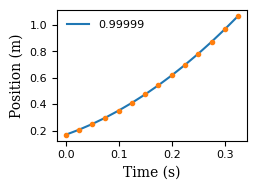

The experimental value of $g$ from Run 5 is 8.296830768094908 or ~ 8.30
The experimental value of initial velocity and initial height from Run 5 are 1.421335461712738 ± 0.009443514484646335 or ~ 1.42 ± 0.01 and 0.16880254999043545±0.0006609272830842466 or ~ 0.17±0.00


In [8]:
#Plot for Run 5
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")



plt.plot(timeframe, model_parabola(timeframe, g5, v05, y05),label = f'{R_squared_5:.5f}' )
plt.plot(timeframe, filtered_Nov8_1_position5, 'o', ms =3)

plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 8)
plt.legend(fontsize = 8, loc = 'best',  frameon = False)
plt.tight_layout()

plt.savefig('Run5_parabola_fit.pdf')

plt.show()

print(f'The experimental value of $g$ from Run 5 is {g5} or ~ {g5:.2f}')
print(f'The experimental value of initial velocity and initial height from Run 5 are {v05 } \u00B1 {np.sqrt(v05_var)} or ~ {v05:.2f} \u00B1 {np.sqrt(v05_var):.2f} and {y05}\u00B1{np.sqrt(y05_var)} or ~ {y05:.2f}\u00B1{np.sqrt(y05_var):.2f}')

In [9]:
#Mask for red plot Run 1
mask1 = (Nov8_1_time1 >= 0.7999999999999999) & (Nov8_1_time1 <= 1.125)

filtered_Nov8_1_position1 = Nov8_1_position1[mask1]


g1, v01, y01 = curve_fit(model_parabola, timeframe, filtered_Nov8_1_position1, p0= [9.8, 0, Nov8_1_position1[0]])[0]

g1_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position1, p0= [9.8, 0, Nov8_1_position1[0]])[1][0][0]

v01_var= curve_fit(model_parabola, timeframe, filtered_Nov8_1_position1, p0= [9.8, 0, Nov8_1_position1[0]])[1][1][1]

y01_var = curve_fit(model_parabola, timeframe, filtered_Nov8_1_position1, p0= [9.8, 0, Nov8_1_position1[0]])[1][2][2]


sum_of_squares_total = np.sum(( filtered_Nov8_1_position1 - np.mean(filtered_Nov8_1_position1))**2)
sum_of_squares_residual = np.sum(( filtered_Nov8_1_position1 - model_parabola(timeframe, g1, v01, y01) )**2)
R_squared_1 = 1 - (sum_of_squares_residual / sum_of_squares_total)
R_squared_1

0.9981351014784832

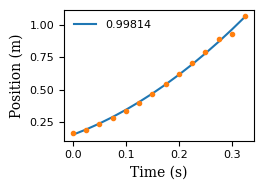

The experimental value of $g$ from Run 1 is 7.79514619049136 or ~ 7.80
The experimental value of initial velocity and initial height from Run 5 are 1.5262887456585659 ±0.1382471926850562 or ~ 1.53 ± 0.14 and 0.1546470627259791±0.009675565180874495 or ~ 0.15± 0.01


In [10]:
#Plot for Run 1
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")

plt.plot(timeframe, model_parabola(timeframe, g1, v01, y01), label = f'{R_squared_1:.5f}')

plt.plot(timeframe, filtered_Nov8_1_position1, 'o', ms =3)

plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 8)
plt.legend(fontsize = 8, loc = 'best',  frameon = False)
plt.tight_layout()

plt.savefig('Run1_parabola_fit.pdf')

plt.show()
print(f'The experimental value of $g$ from Run 1 is {g1} or ~ {g1:.2f}')
print(f'The experimental value of initial velocity and initial height from Run 5 are {v01 } \u00B1{np.sqrt(v01_var)} or ~ {v01:.2f} \u00B1 {np.sqrt(v01_var):.2f} and {y01}\u00B1{np.sqrt(y01_var)} or ~ {y01:.2f}\u00B1 {np.sqrt(y01_var):.2f}')